In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import sent_tokenize
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Extraction de phrase importante du texte

## Methode TF-IDF
On utilise TF-IDF pour affecter un score a chaque phrase et on garde les 3 phrase les plus importantes, c'est a dire celle dont la moyenne des score de la ligne de la matrice tf-idf est la plus haute.

## Methode TF-IDF avec poids
C'est a peut près la même methode sauf qu'on affecte un poids a la phrase en fonction de sa position dans le texte et on ajoute aussi un poids au niveau de la similarité en entre les phrase entre elles.

In [2]:
def summarize_tf_idf(text, n_sentences=3):

    sentences = sent_tokenize(text)

    # texte trop court on renvoi le texte direct

    if len(sentences) <= n_sentences:
        return text

    # 2. Calcule TF-IDF par phrase (chaque phrase = document)
    tfidf = TfidfVectorizer()
    tfidf_matrix = tfidf.fit_transform(sentences)

    # 3. Score : moyenne TF-IDF de chaque phrase
    sentence_scores = np.asarray(tfidf_matrix.mean(axis=1)).ravel()

    # 4. Indices des meilleures phrases
    top_idx = sentence_scores.argsort()[-n_sentences:][::-1]
    top_idx_sorted = sorted(top_idx)  # pour garder l'ordre dans le texte

    # 5. Résumé
    summary = " ".join([sentences[i] for i in top_idx_sorted])
    return summary

In [28]:
def normalize(arr):
    return (arr - np.min(arr)) / (np.max(arr) - np.min(arr) + 1e-8)

def summarize_tf_idf_with_scores(text, n_sentences=3, position_weight=0.5):
    from sklearn.feature_extraction.text import TfidfVectorizer
    from nltk.tokenize import sent_tokenize
    import numpy as np

    sentences = sent_tokenize(text)

    if len(sentences) <= n_sentences:
        return text, [], [], [], []

    tfidf = TfidfVectorizer()
    tfidf_matrix = tfidf.fit_transform(sentences)
    tfidf_scores = np.asarray(tfidf_matrix.mean(axis=1)).ravel()

    n = len(sentences)
    # position_scores = np.array([(1 - (i / n)) for i in range(n)])
    position_scores = np.exp(-np.arange(n))

    # Similarité de chaque phrase avec le document global (moyenne TF-IDF)
    doc_vector = np.asarray(tfidf_matrix.mean(axis=0)).ravel().reshape(1, -1)
    cosine_sim = cosine_similarity(tfidf_matrix, doc_vector)
    cosine_similarity_scores = cosine_sim.ravel()

    # final_scores = (1 - position_weight) * tfidf_scores + position_weight * position_scores
    # final_scores = (
    # 0.6 * normalize(tfidf_scores) +
    # 0.3 * normalize(position_scores) +
    # 0.1 * normalize(cosine_similarity_scores)
    # )
    final_scores = (
    0.7 * normalize(tfidf_scores) +
    0.2 * normalize(position_scores) +
    0.1 * normalize(cosine_similarity_scores)
    )
    top_idx = final_scores.argsort()[-n_sentences:][::-1]
    top_idx_sorted = sorted(top_idx)

    summary = " ".join([sentences[i] for i in top_idx_sorted])
    return summary, sentences, tfidf_scores, position_scores, cosine_similarity_scores, final_scores

In [15]:
import matplotlib.pyplot as plt

def plot_summary_scores(sentences, tfidf_scores, position_scores, cosine_similarity_scores, final_scores):
    n = len(sentences)
    x = np.arange(n)
    plt.figure(figsize=(14, 6))

    plt.plot(x, tfidf_scores, label="TF-IDF", marker='o')
    plt.plot(x, position_scores, label="Position", marker='x')
    plt.plot(x, cosine_similarity_scores, label="Cosine Similarity", marker='^')
    plt.plot(x, final_scores, label="Score Final", marker='s', linewidth=2, color='black')

    plt.xticks(x, [f"{i+1}" for i in x], rotation=0)
    plt.xlabel("Index de la phrase")
    plt.ylabel("Score")
    plt.title("Score des phrases dans le résumé extractif")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

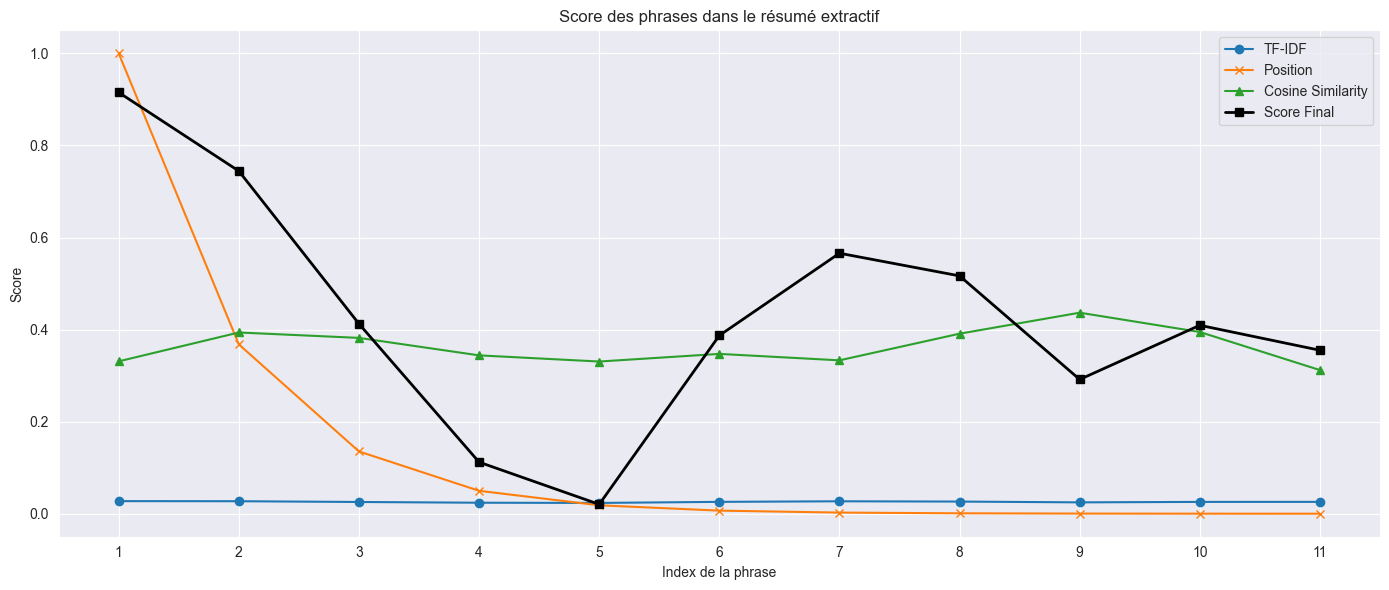


Résumé généré :
 “Rising Tensions Between Nations Spark Global Concern”
Tensions are escalating between two major world powers following a series of military exercises conducted near disputed territories. The exercises, which involved naval fleets and advanced air defense systems, have been condemned by neighboring countries as provocative and destabilizing. Analysts suggest that the current standoff is part of a broader geopolitical shift, where emerging alliances are challenging traditional power structures.


In [23]:
texte = """“Rising Tensions Between Nations Spark Global Concern”
Tensions are escalating between two major world powers following a series of military exercises conducted near disputed territories. The exercises, which involved naval fleets and advanced air defense systems, have been condemned by neighboring countries as provocative and destabilizing. In response, allied nations have initiated joint drills of their own, heightening fears of an arms race in the region.

The United Nations has called for immediate de-escalation and has urged all parties to return to the negotiation table. However, diplomatic efforts remain stalled, with both sides accusing each other of aggression and misinformation. Economic sanctions have also been proposed, further straining international relations and sparking concerns over global supply chain disruptions.

Analysts suggest that the current standoff is part of a broader geopolitical shift, where emerging alliances are challenging traditional power structures. The media and public opinion are sharply divided, with some calling for restraint and others supporting strong national defense policies.

As the situation develops, international organizations and peacekeeping missions are preparing contingency plans in case of conflict. Meanwhile, civilian populations near the conflict zones are facing uncertainty and growing anxiety about potential displacement and economic instability. The next few weeks will be critical in determining whether diplomacy can prevail or if confrontation is inevitable."""

summary, sentences, tfidf_scores, position_scores, cosine_scores, final_scores = summarize_tf_idf_with_scores(texte)

# Affiche les scores
plot_summary_scores(sentences, tfidf_scores, position_scores, cosine_scores, final_scores)

print("\nRésumé généré :\n", summary)

In [9]:
summary2 = summarize_tf_idf(texte)
print(summary2)

“Rising Tensions Between Nations Spark Global Concern”
Tensions are escalating between two major world powers following a series of military exercises conducted near disputed territories. The exercises, which involved naval fleets and advanced air defense systems, have been condemned by neighboring countries as provocative and destabilizing. Analysts suggest that the current standoff is part of a broader geopolitical shift, where emerging alliances are challenging traditional power structures.


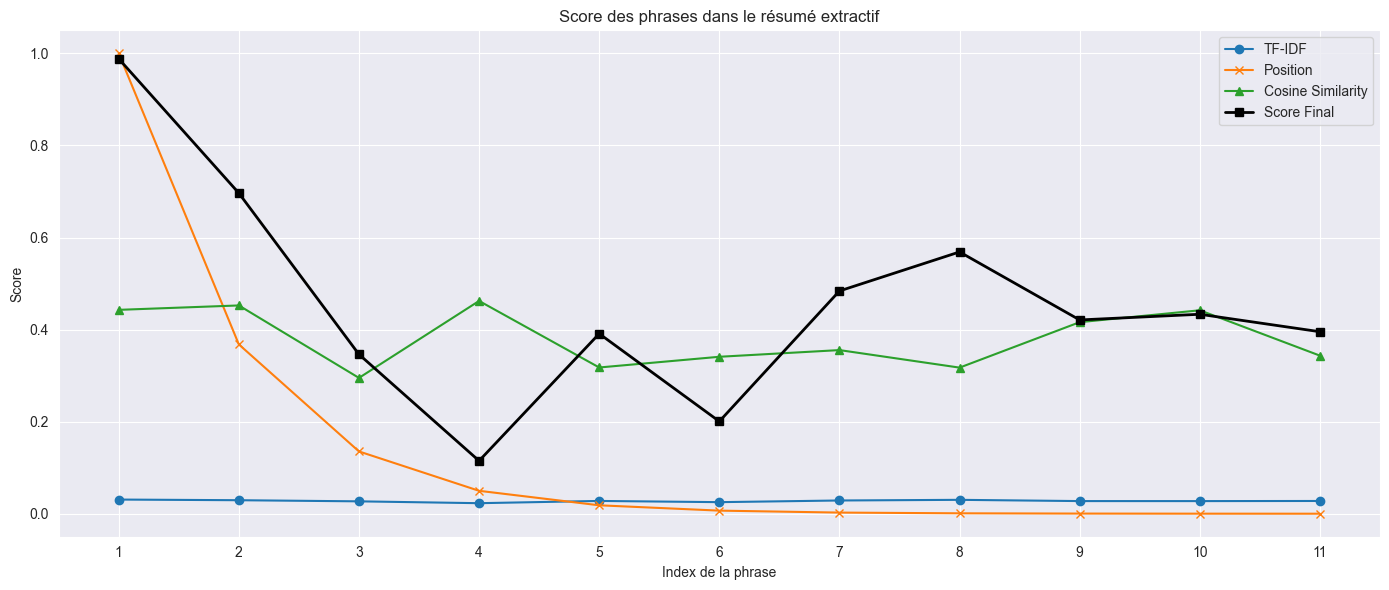


Résumé généré :
 “Breakthrough in Fusion Energy Sparks Hope for Clean Power”
After decades of research and billions in funding, scientists at the International Fusion Research Center have announced a significant breakthrough in nuclear fusion. For the first time, a reactor has produced more energy than it consumed, marking a key milestone in the quest for limitless clean energy. Some climate scientists, though, warn against seeing it as a silver bullet, stressing that policy changes and renewable infrastructure remain critical.


In [25]:
text = """“Breakthrough in Fusion Energy Sparks Hope for Clean Power”
After decades of research and billions in funding, scientists at the International Fusion Research Center have announced a significant breakthrough in nuclear fusion. For the first time, a reactor has produced more energy than it consumed, marking a key milestone in the quest for limitless clean energy. The experiment, conducted under strict conditions, used magnetic confinement to stabilize plasma at extremely high temperatures.

Experts are calling the results a historic moment for science and energy policy. However, they caution that commercial applications are still many years away, citing engineering, regulatory, and financial hurdles. The announcement has nevertheless triggered renewed interest and investment from both public and private sectors.

Environmental groups have largely welcomed the news, emphasizing the potential of fusion to reduce global dependence on fossil fuels. Some climate scientists, though, warn against seeing it as a silver bullet, stressing that policy changes and renewable infrastructure remain critical.

The global energy market reacted swiftly, with shares in traditional energy companies dipping and clean tech stocks surging. Governments worldwide are reassessing their long-term energy strategies, and many are considering increasing funding for advanced energy research. The road ahead is long, but optimism has returned to a field once written off as science fiction."""

summary, sentences, tfidf_scores, position_scores, cosine_scores, final_scores = summarize_tf_idf_with_scores(text)

# Affiche les scores
plot_summary_scores(sentences, tfidf_scores, position_scores, cosine_scores, final_scores)

print("\nRésumé généré :\n", summary)

In [13]:
summary2 = summarize_tf_idf(text)
print(summary2)

“Breakthrough in Fusion Energy Sparks Hope for Clean Power”
After decades of research and billions in funding, scientists at the International Fusion Research Center have announced a significant breakthrough in nuclear fusion. For the first time, a reactor has produced more energy than it consumed, marking a key milestone in the quest for limitless clean energy. Some climate scientists, though, warn against seeing it as a silver bullet, stressing that policy changes and renewable infrastructure remain critical.


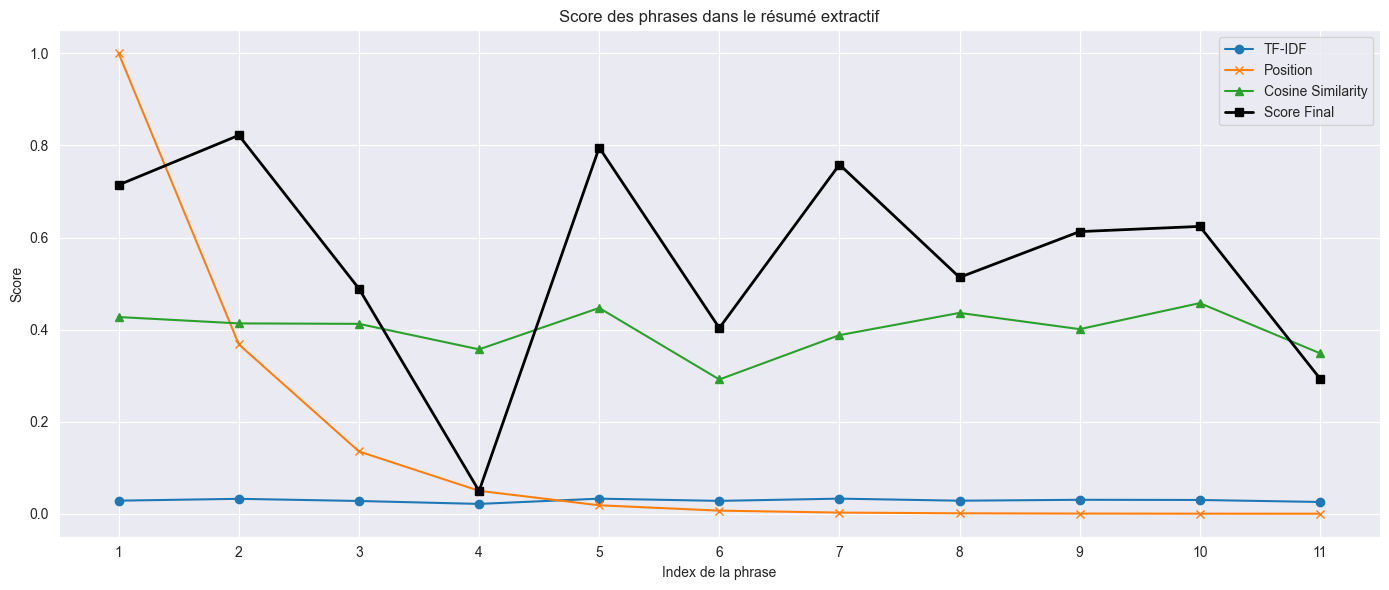


Résumé généré :
 Private companies and national agencies are accelerating plans to extract valuable resources like rare earth metals and water from asteroids and the Moon. The current international legal framework, based on the 1967 Outer Space Treaty, lacks clear guidelines for ownership and commercial exploitation beyond Earth. Despite these concerns, several countries are drafting national laws to support space mining initiatives, raising fears of a new era of geopolitical competition.


In [29]:
sneaky_text = """“The Debate Over Space Mining Intensifies”
As global interest in space exploration grows, so does the controversy surrounding space mining. Private companies and national agencies are accelerating plans to extract valuable resources like rare earth metals and water from asteroids and the Moon. Proponents argue that space mining could alleviate shortages on Earth and make space travel more sustainable.

However, critics warn of legal ambiguity and environmental concerns. The current international legal framework, based on the 1967 Outer Space Treaty, lacks clear guidelines for ownership and commercial exploitation beyond Earth. Furthermore, extracting resources in low-gravity environments could have unforeseen ecological effects on celestial bodies.

Despite these concerns, several countries are drafting national laws to support space mining initiatives, raising fears of a new era of geopolitical competition. The lack of global consensus could lead to a legal vacuum where the most powerful players dictate the rules.

Scientists and ethicists are also calling for caution, urging the global community to prioritize shared governance, transparency, and sustainability. Some advocate for the creation of an international space resources agency, akin to the International Atomic Energy Agency, to manage rights and responsibilities. The next decade may determine whether space becomes a domain of cooperation—or conflict."""

summary, sentences, tfidf_scores, position_scores, cosine_scores, final_scores = summarize_tf_idf_with_scores(sneaky_text)

# Affiche les scores
plot_summary_scores(sentences, tfidf_scores, position_scores, cosine_scores, final_scores)

print("\nRésumé généré :\n", summary)

In [27]:
summary2 = summarize_tf_idf(sneaky_text)
print(summary2)

Private companies and national agencies are accelerating plans to extract valuable resources like rare earth metals and water from asteroids and the Moon. The current international legal framework, based on the 1967 Outer Space Treaty, lacks clear guidelines for ownership and commercial exploitation beyond Earth. Despite these concerns, several countries are drafting national laws to support space mining initiatives, raising fears of a new era of geopolitical competition.


On remarque que la methode plus simple avec seulement TF-IDF fonctionne aussi bien que la méthode plus avancée